(exploring-table-data)=
# Exploring table data
This week, our in-class work will focus on two topics in tandem. First, we'll be getting practice with handling real-world tabular data using Pandas. Second, we'll be thinking about how we deal with sex differences in neuroscience and sex as a biological variable.

Let's tackle those in reverse. Since 2016, NIH has required that its projects properly account for [sex as a biological variable](https://orwh.od.nih.gov/sex-gender/nih-policy-sex-biological-variable) in research designs. To grossly oversimplify, if females make up 50% of the human population we hope to benefit, you need to have a strong reason for only using only a single sex (usually males) in your study. Of course, there are such reasons (some courtship behaviors, maternal behavior), but the purpose of the policy is to move researchers away from viewing "male" as a biological default.

As several papers have pointed out (e.g. {cite:t}`shansky2021considering`) this will require a shift in thinking. Not only because it's typical to treat female physiology as more complicated {cite:p}`shansky2019hormones` but because underpowered or misinterpreted studies on sex differences have been used to reinforce stereotypes {cite:p}`grissom2019let`. For this reason, it's important to think in a methodologically rigorous way about how we investigate sex differences, even when they're not the primary aim of our research. 

Our data this week come from a recent study in this vein from {cite:t}`chensexdiffs2021` at the University of Minnesota, who examined sex differences in mice performing a restless bandit task. Briefly, the task presents animals with two options, both of which are (probabilistically) rewarded but whose values change in time. This requires animals to trade off exploiting an option with known value against exploring the value of an option they haven't chosen in a while. As the authors report in the paper, while both sexes achieved the same reward rates in the task, the strategies they used to do so differed in interesting ways.

Fortunately, the authors posted their data to an [online repository](https://datadryad.org/stash/dataset/doi:10.5061/dryad.z612jm6c0) (yay open science!). If you're working locally, you can download from this link. If not, you can start your Colab notebook with the following cell, which will download the data and unzip it for you:

In [1]:
%%bash
curl --output tmp.zip -L -X GET "https://datadryad.org/api/v2/datasets/doi%3A10.5061%2Fdryad.z612jm6c0/download" -H "accept: application/zip"
unzip tmp.zip
unzip cleaned_up_restless_final_data.zip
rm tmp.zip
rm README.txt
rm cleaned_up_restless_final_data.zip
chmod -R u+wx cleaned\ up\ restless\ final\ data
mv cleaned\ up\ restless\ final\ data data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1868    0  1868    0     0   2851      0 --:--:-- --:--:-- --:--:--  2847
100 1158k  100 1158k    0     0   652k      0  0:00:01  0:00:01 --:--:-- 2258k


Archive:  tmp.zip
 extracting: cleaned_up_restless_final_data.zip  
 extracting: README.txt              
Archive:  cleaned_up_restless_final_data.zip
   creating: cleaned up restless final data/
  inflating: cleaned up restless final data/README.txt  
   creating: cleaned up restless final data/session1/
  inflating: cleaned up restless final data/session1/1.csv  
  inflating: cleaned up restless final data/session1/10.csv  
  inflating: cleaned up restless final data/session1/11.csv  
  inflating: cleaned up restless final data/session1/12.csv  
  inflating: cleaned up restless final data/session1/13.csv  
  inflating: cleaned up restless final data/session1/14.csv  
  inflating: cleaned up restless final data/session1/15.csv  
  inflating: cleaned up restless final data/session1/16.csv  
  inflating: cleaned up restless final data/session1/17.csv  
  inflating: cleaned up restless final data/session1/18.csv  
  inflating: cleaned up restless final data/session1/19.csv  
  inflating:

The files are in the `data` folder, with one subfolder for each session. Animals 1&ndash;16 are male, 17&ndash;32 female. Our goal for today will be to aggregate all this data into a single tidy data frame that we can use to perform some exploratory plotting.

## Loading table data
The most common format for storing tabular data is in comma-separated
value or `.csv` format, in which each line of the file contains a row of
the table, with columns separated by commas. Often, the first line of the
file lists the column names, also separated by commas.

```{admonition} Exercise
1. Start by loading the data for a single session and a single animal into Pandas. This can be done via the `pandas.read_csv` function. Note that the first column of the `csv` file is an index, so you might want to provide the `index_col=0` keyword argument.

1. Print the first 5 rows of the table. What are the column names? What is a way to find this out without printing the table directly (i.e., what if you had to find this out within a function)?
```

### Solution:

In [2]:
# import pandas package
import pandas as pd

# load data from a csv into a table
data_path = 'data/'
dat = pd.read_csv(data_path + 'session1/1.csv', index_col=0)
dat.head(5)

,left,right,choice,reward,state,RT,retrieval,initiation
0,0.5,0.6,1,0,1,3.945,0.000,2.387
1,0.5,0.6,2,1,1,1.787,1.717,1.248
2,0.5,0.6,1,0,1,2.235,0.000,0.000
3,0.5,0.6,2,0,1,2.026,0.000,4.393
4,0.5,0.6,1,1,1,1.977,1.603,1.959


In [3]:
# get column names without printing
dat.columns

Index(['left', 'right', 'choice', 'reward', 'state', 'RT', 'retrieval',
       'initiation'],
      dtype='object')

## First plots
As we did last week, let's try out some ideas on this small chunk of data by making plots.

```{admonition} Exercise
1. The `left` and `right` columns list the probability reward for nosepokes to the left and right targets on each trial. Plot the values of both of these over time. What would the optimal strategy for the mice be in this situation if they knew this information? How should this change if they _don't_ know the values?

1. The `choice` variable is coded `1` for a left choice and `2` for a right choice. Make a plot that shows how choices track reward probabilities for the two options. Since choice only has two values, you might want to smooth the series. You can either adopt the convolutional approach we used last week or use the Pandas [windowing operations](https://pandas.pydata.org/docs/user_guide/window.html#window-generic).

1. Plot the cumulative reward earned by the animal as a function of trial in the session.
```

### Solution:

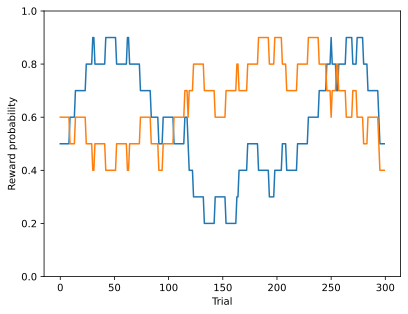

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# plot left and right values over time

plt.plot(dat[['left', 'right']])
plt.xlabel('Trial')
plt.ylabel('Reward probability')
plt.ylim(0, 1);

```{toggle}
If the mice _knew_ the values, they would choose whichever is maximal at a given time. If they _don't_ know the values of each option, they need to estimate them, and explore when it's likely another option is better. (Actually, calculating the optimal strategy in situations like this is a surprisingly rich mathematical problem.)
```

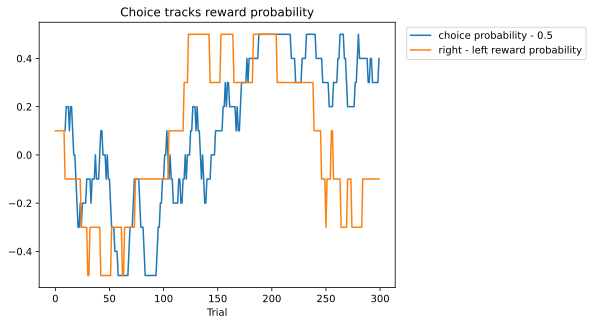

In [5]:
# plot choice probability

choice_prob = dat.choice.rolling(10).mean() - 1  # 10-bin window by default, this will use the *past only*
plt.plot(choice_prob - 0.5, label='choice probability - 0.5')
plt.plot(dat.right - dat.left, label='right - left reward probability')
plt.legend(loc=1, bbox_to_anchor=(1.55, 1))
plt.xlabel('Trial')
plt.title('Choice tracks reward probability');

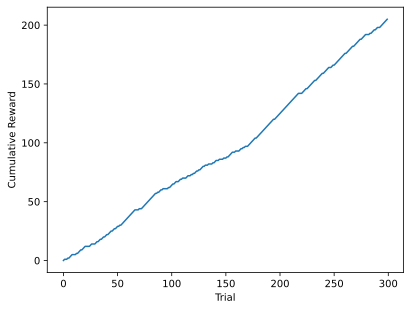

In [6]:
#plot cumulative reward

plt.plot(dat.reward.cumsum())
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward');

## Combining data sets
With these simple analyses under our belt, we can think about how we want to analyze data for all the animals combined. There are two basic approaches:
- Loop over data sets, applying the same analysis to each one. Then write out the results to disk or hold them all in a list in memory.
- Combine all the data together into a single `DataFrame` object that can be easily manipulated for a wide variety of analyses.

### Tidying data
Many data tables are structured with multiple observations in each row, but for many analysis and visualization needs, data are better structured as one observation per row or ["tidy" data](https://www.jstatsoft.org/article/view/v059i10). While not perfect for all purposes, tidy data provides a method for canonicalizing data so that software can focus on transferring to and from a fixed form.

In Pandas, the key functions for this purpose are [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) and [`stack`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html), along with several others. For a more full-featured approach in R, see [tidyverse](https://www.tidyverse.org) and the comparison [here](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html).


```{admonition} Exercise
1. Given that each `csv` file contains data from one session from one animal, what additional columns do we need to put the final _combined_ data frame into tidy format?

1. Write code that performs this conversion for _a single dataset_:
    - Load the data set.
    - Add columns for the session, subject number, and sex of the animal. Note that these will be the same for the entire data set.
    - Makes the index (trial number) into a new column called `trial`. Hint [`reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).

1. Is there any additional information you will need to _uniquely_ identify each row? Can that be added at this stage?
```

#### Solution:

In [7]:
# add columns to make the dataframe tidy
# we need columns for session and subject

chunk = pd.read_csv(data_path + 'session1/1.csv', index_col=0)
session = 1
sub = 1

# add columns for session and subject
chunk['session'] = session
chunk['subject'] = sub
if sub <= 16:
    chunk['sex'] = 'M'
else:
    chunk['sex'] = 'F'

# make a trial column by resetting the current index and renaming to trial
chunk = chunk.reset_index()
chunk = chunk.rename(columns={"index": "trial"})

chunk

,trial,left,right,choice,reward,state,RT,retrieval,initiation,session,subject,sex
0,0,0.5,0.6,1,0,1,3.945,0.000,2.387,1,1,M
1,1,0.5,0.6,2,1,1,1.787,1.717,1.248,1,1,M
2,2,0.5,0.6,1,0,1,2.235,0.000,0.000,1,1,M
3,3,0.5,0.6,2,0,1,2.026,0.000,4.393,1,1,M
4,4,0.5,0.6,1,1,1,1.977,1.603,1.959,1,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.5,0.4,2,1,3,1.527,1.174,0.001,1,1,M
296,296,0.5,0.4,2,1,3,2.611,1.319,0.000,1,1,M
297,297,0.5,0.4,2,1,3,1.996,1.042,0.904,1,1,M
298,298,0.5,0.4,2,1,3,1.826,1.181,0.000,1,1,M


### Data in multiple directories
Now that we can load and add needed information to each data chunk, we have to think about how to systematically go through subdirectories and load data. For this, we'll use the `walk` function from the `os` module, which takes a directory name as input and returns a generator we can loop over. Our overall strategy will be to walk through the directory, loading all the `csv` files, process each one, hold the results in a list, and use [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to combine them into a single data frame at the end.

This bit can be a little tricky, so we'll break it down in pieces:

```{admonition} Exercise
1. Write a loop that simply prints the information given by `os.walk` as we go through the data directory. Which of these pieces do you need?

1. We don't need to process all the directories returned by this process. Write code to prevent us from doing so.

1. Write code that extracts the session number from the directory name. Remember that `int` converts a string to an integer.

1. Write code that ensures we only process files that end in `.csv`.

1. Write code that gets the subject number from the file name.

1. Using the code you wrote above, add session, subject, sex, and trial columns to the data set.

1. Append this data frame to the list you're using to hold the results.

1. Finally, concatenate the results list to form a new data frame. Note that the index is not unique, so for technical reasons, it will help to `reset_index` again to get a unique index for each row.
```

#### Solution:

In [8]:
import os

chunk_list = []
for (dirname, _, files) in list(os.walk(data_path)):
  folder = dirname.split('/')[-1]
  if 'session' in folder:
    session = int(folder[7:])  # make it an integer
    for fname in files:
      if fname.endswith('.csv'):
        sub = int(fname.split('.')[0])  # make it an integer
        chunk = pd.read_csv(dirname + '/' + fname, index_col=0)

        # add columns for session and subject
        chunk['session'] = session
        chunk['subject'] = sub
        if sub <= 16:
          chunk['sex'] = 'M'
        else:
          chunk['sex'] = 'F'
        
        # make a trial column by resetting the current index and renaming to trial
        chunk = chunk.reset_index()
        chunk = chunk.rename(columns={"index": "trial"})
        
        chunk_list.append(chunk)

print("Total number of chunks: {}".format(len(chunk_list)))


# concatenate all data frames together

dat = pd.concat(chunk_list).reset_index(drop=True)  # overwrites our old dat variable!
dat

Total number of chunks: 256


,trial,left,right,choice,reward,state,RT,retrieval,initiation,session,subject,sex
0,0,0.5,0.3,1,1,1,4.073,1.449,1.845,4,6,M
1,1,0.5,0.3,1,1,1,2.949,1.222,1.246,4,6,M
2,2,0.5,0.3,1,1,1,2.732,1.436,0.404,4,6,M
3,3,0.6,0.2,1,1,1,1.653,1.403,10.431,4,6,M
4,4,0.7,0.3,2,1,1,4.141,2.780,0.000,4,6,M
...,...,...,...,...,...,...,...,...,...,...,...,...
70773,68,0.3,0.8,2,1,1,2.587,1.777,18.281,8,8,M
70774,69,0.4,0.9,2,1,1,3.044,1.716,0.001,8,8,M
70775,70,0.4,0.9,2,1,1,2.921,2.720,0.000,8,8,M
70776,71,0.5,0.8,2,0,1,3.553,0.000,0.000,8,8,M


## Group-level statistics
Having data in tidy format can facilitate easier comparisons across observation types. In Pandas, the relevant code pattern is to call [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) on the `DataFrame`, followed by a call to a summary statistic like `mean` or `std`. That is, if `data` is a `DataFrame`:
```python
data.groupby(by=['column1', 'column5']).mean()
```
will calculate a groupwise mean. More generally, this pattern of breaking data into chunks based on a combination of variables, performing some analysis, and aggregating the results is known as [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

```{admonition} Exercise
1. Use `groupby` to calculate the mean and variance of the reaction time for each animal in each session.
```

### Solution:

In [9]:
dat.groupby(['subject', 'session']).RT.agg(['mean', 'var'])

mean         var
subject session                      
1       1        2.722293   10.967707
        2        5.345410  376.833405
        3        3.266718    4.629838
        4        3.041440    4.596238
        5        4.084762    8.817232
...                   ...         ...
32      4        3.608547   31.459340
        5        2.572577    9.237009
        6        3.565250   31.661808
        7        3.583887   30.114035
        8        2.970333    9.691184

[256 rows x 2 columns]

## Exploratory plotting redux
Now let's try to generalize our plot above of accumulated rewards over time. This time, however, we'd like to plot accumulated rewards for _all animals_ across _all sessions_. As you might expect, `groupby` will be our friend, but we'll have to figure out how to calculate the information we need. As we'll see, it's easiest to do this by adding the new variables as columns to our data frame.

### The final tidy
````{admonition} Exercise
1. To make sure the steps below work, we need to start by sorting the data frame by subject and session. (Be sure to save the result or use `inplace=True`!)

1. Using `groupby`, calculate the cumulative reward for each subject and each session as we did for a single dataset above. Assign this to a new column in the data frame.

1. Similarly, calculate the cumulative reward for each subject _across all sessions_ and assign this as a different column in the dataframe.

1. The one relevant piece of information we still don't have, the one that would uniquely identify each row and make the data frame tidy, is a _unique_ trial number for each animal across sessions. If `dat` is the data frame and `trial` is the column containing the (within-session) trial number, the following line of code creates such a column:
```python
dat['cumulative_trial'] = dat.groupby(['subject']).trial.transform(lambda x: x.reset_index().index)
```
How does this work?
````

#### Solution:

```{toggle}
The strategy here is as follows:
1. Group the data frame into chunks, one per subject.
1. Pull out the column we want.
1. Perform some transformation (e.g., cumulative sum).
1. Assign the result back as a new column.
```

In [10]:
dat = dat.sort_values(by=['subject', 'session'])
dat['cumulative_reward_session'] = dat.groupby(['subject', 'session']).reward.cumsum()
dat['cumulative_reward_lifetime'] = dat.groupby(['subject']).reward.cumsum()
dat['cumulative_trial'] = dat.groupby(['subject']).trial.transform(lambda x: x.reset_index().index)
dat.head()

,trial,left,right,choice,reward,state,RT,retrieval,initiation,session,subject,sex,cumulative_reward_session,cumulative_reward_lifetime,cumulative_trial
53881,0,0.5,0.6,1,0,1,3.945,0.000,2.387,1,1,M,0,0,0
53882,1,0.5,0.6,2,1,1,1.787,1.717,1.248,1,1,M,1,1,1
53883,2,0.5,0.6,1,0,1,2.235,0.000,0.000,1,1,M,1,1,2
53884,3,0.5,0.6,2,0,1,2.026,0.000,4.393,1,1,M,1,1,3
53885,4,0.5,0.6,1,1,1,1.977,1.603,1.959,1,1,M,2,2,4


### Why did we do all this?
The above approach &mdash; adding a bunch of variables to our data frame rather than extracting what we need &mdash; might seem like overkill, but as R users know, the approach really shines when we want to start grouping our analyses by different sets of variables. As an example, with our expanded data set, Seaborn easily lets us easily make both of the following plots with a simple variation in the same command:

```{admonition} Exercise
1. Using `lineplot`, plot cumulative reward across all sessions, aggregating by sex. (Hint: since `lineplot` automatically calculates bootstrapped confidence intervals and this can take a long time for big datasets, you might want to supply the keyword `ci=None`.)

1. Make the same plot, showing cumulative rewards for all individuals.
```

#### Solution:

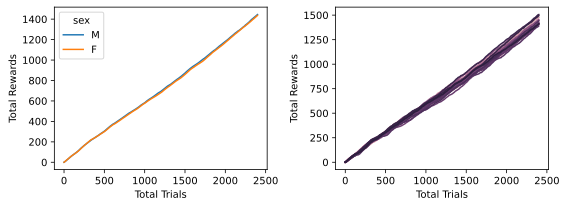

In [17]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.lineplot(ax=ax[0], data=dat, x='cumulative_trial', 
             y='cumulative_reward_lifetime', hue='sex', errorbar=None)
sns.lineplot(ax=ax[1], data=dat, x='cumulative_trial', 
             y='cumulative_reward_lifetime', hue='subject', errorbar=None, legend=None)
ax[0].set_xlabel('Total Trials')
ax[1].set_xlabel('Total Trials')
ax[0].set_ylabel('Total Rewards')
ax[1].set_ylabel('Total Rewards')

plt.tight_layout()

In [18]:
import shutil
shutil.rmtree('data')